In [1]:
import tensorflow as tf
import numpy as np

# Quickstart

In [16]:
# https://www.tensorflow.org/tutorials/quickstart/beginner

In [4]:
# load mnist dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [5]:
# convert from integer to floating point
x_train, x_test = x_train / 255.0, x_test / 255.0

In [6]:
# create a sequential model (MLP)
# Sequential groups a linear stack of layers into a tf.keras.Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), # flatten the input into 1-D
    tf.keras.layers.Dense(128, activation='relu'), # regular fully-connected layer
    tf.keras.layers.Dropout(0.2), # dropout layer, setting input units to 0 with a frequency of rate
    tf.keras.layers.Dense(10) # regular fully-connected layer. default activation is no activation
])

In [7]:
# predictions with randomly initialized weights
predictions = model(x_train[:1]).numpy()
predictions


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



array([[ 0.39766353, -0.08835667,  1.1138604 , -0.20140848,  0.43693435,
         0.9213433 ,  0.2317308 , -0.1305928 , -0.23675317, -0.10951892]],
      dtype=float32)

In [8]:
# softmax converts these logits to "probabilities" for each class
tf.nn.softmax(predictions).numpy()

array([[0.10516933, 0.06468643, 0.2152432 , 0.05777174, 0.10938159,
        0.17754987, 0.08908928, 0.06201122, 0.05576548, 0.06333191]],
      dtype=float32)

In [9]:
# this loss is equal to the negative log probability of the true class.
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
# as the weights are randomly initialized, the initial loss should be close to -tf.log(1/10)=2.3
loss_fn(y_train[:1], predictions).numpy()

1.7285037

In [10]:
model.compile(optimizer='adam', # adam method as iterative update. CMU 11-785, L7
              loss=loss_fn, 
              metrics=['accuracy'])

In [11]:
model.fit(x_train, y_train, epochs=5) # training with 5 epochs

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 35us/sample - loss: 0.3013 - accuracy: 0.9128
Epoch 2/5
60000/60000 [==============================] - 2s 30us/sample - loss: 0.1437 - accuracy: 0.9569
Epoch 3/5
60000/60000 [==============================] - 2s 30us/sample - loss: 0.1106 - accuracy: 0.9668
Epoch 4/5
60000/60000 [==============================] - 2s 30us/sample - loss: 0.0907 - accuracy: 0.9715
Epoch 5/5
60000/60000 [==============================] - 2s 30us/sample - loss: 0.0779 - accuracy: 0.9751


In [12]:
model.evaluate(x_test, y_test, verbose=2)

10000/10000 - 0s - loss: 0.0782 - accuracy: 0.9760


[0.07824939721073024, 0.976]

In [14]:
# add a softmax layer
probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

In [15]:
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[4.0722631e-07, 8.0131155e-09, 2.6225230e-06, 3.0007391e-04,
        3.0527074e-11, 1.7148874e-06, 1.4954973e-12, 9.9959856e-01,
        1.3707400e-07, 9.6658849e-05],
       [5.4369912e-07, 1.0880732e-04, 9.9988914e-01, 5.5839445e-07,
        2.7062792e-15, 8.5470975e-07, 7.3613610e-10, 3.6062590e-11,
        3.5749188e-08, 2.6668329e-12],
       [6.3636492e-08, 9.9975306e-01, 3.5143526e-05, 5.2558144e-06,
        1.5342093e-05, 2.5490001e-06, 1.8049634e-05, 9.9342127e-05,
        6.9875387e-05, 1.2584385e-06],
       [9.9964833e-01, 5.4916587e-09, 2.6757485e-04, 5.3140175e-06,
        9.7841155e-07, 7.9166475e-06, 4.2170992e-05, 6.8572813e-06,
        1.5888881e-08, 2.0828269e-05],
       [1.0952320e-05, 1.6109102e-08, 1.0160403e-05, 1.4162734e-07,
        9.9733573e-01, 1.4145382e-06, 8.4824831e-05, 5.1777173e-05,
        7.9710333e-07, 2.5040742e-03]], dtype=float32)>

# ML Basics with Keras

## Basic Image classification

In [17]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [18]:
# load data
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [19]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [20]:
train_images.shape

(60000, 28, 28)

In [21]:
len(train_labels)

60000

In [22]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [23]:
test_images.shape, len(test_labels)

((10000, 28, 28), 10000)

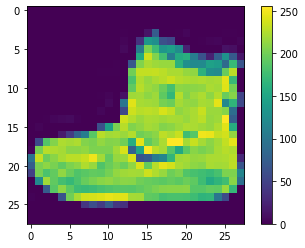

In [24]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [25]:
train_images, test_images = train_images / 255.0, test_images / 255.0

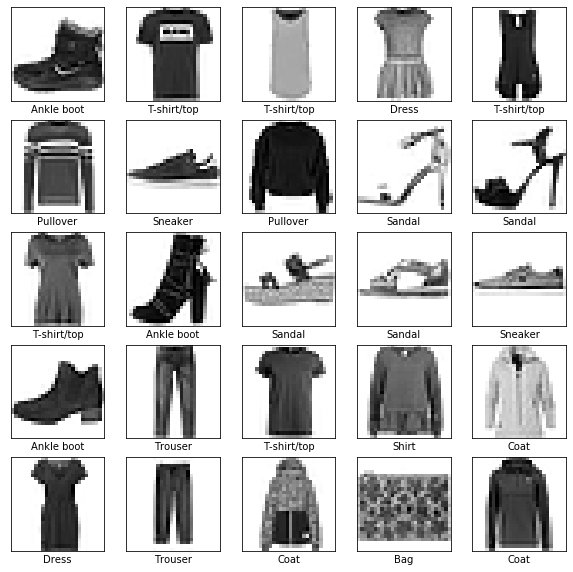

In [26]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [27]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(28, activation='relu'),
    keras.layers.Dense(10)
])

In [28]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [29]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 29us/sample - loss: 0.5732 - accuracy: 0.8042
Epoch 2/10
60000/60000 [==============================] - 1s 25us/sample - loss: 0.4209 - accuracy: 0.8517
Epoch 3/10
60000/60000 [==============================] - 1s 25us/sample - loss: 0.3903 - accuracy: 0.8634
Epoch 4/10
60000/60000 [==============================] - 1s 24us/sample - loss: 0.3707 - accuracy: 0.8686
Epoch 5/10
60000/60000 [==============================] - 1s 25us/sample - loss: 0.3560 - accuracy: 0.8733
Epoch 6/10
60000/60000 [==============================] - 2s 25us/sample - loss: 0.3445 - accuracy: 0.8759
Epoch 7/10
60000/60000 [==============================] - 2s 26us/sample - loss: 0.3355 - accuracy: 0.8801
Epoch 8/10
60000/60000 [==============================] - 2s 26us/sample - loss: 0.3296 - accuracy: 0.8805
Epoch 9/10
60000/60000 [==============================] - 2s 26us/sample - loss: 0.3227 - accuracy: 0.8834
Epoch 10/10
60

In [30]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("\nTest accuracy:", test_acc)

10000/10000 - 0s - loss: 0.3873 - accuracy: 0.8617

Test accuracy: 0.8617


In [31]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [32]:
predictions = probability_model.predict(test_images)

In [33]:
predictions[0]

array([2.1592050e-06, 6.6456329e-10, 9.6305585e-06, 6.0217722e-06,
       3.3860647e-06, 5.5157193e-03, 6.3221385e-05, 6.9396593e-02,
       1.2508462e-03, 9.2375243e-01], dtype=float32)

In [34]:
np.argmax(predictions[0]) == test_labels[0]

True

In [37]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel("{} : {:2.0f}% ({})".format(class_names[predicted_label],
                                          100*np.max(predictions_array),
                                          class_names[true_label]),
              color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

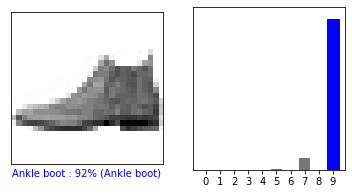

In [38]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

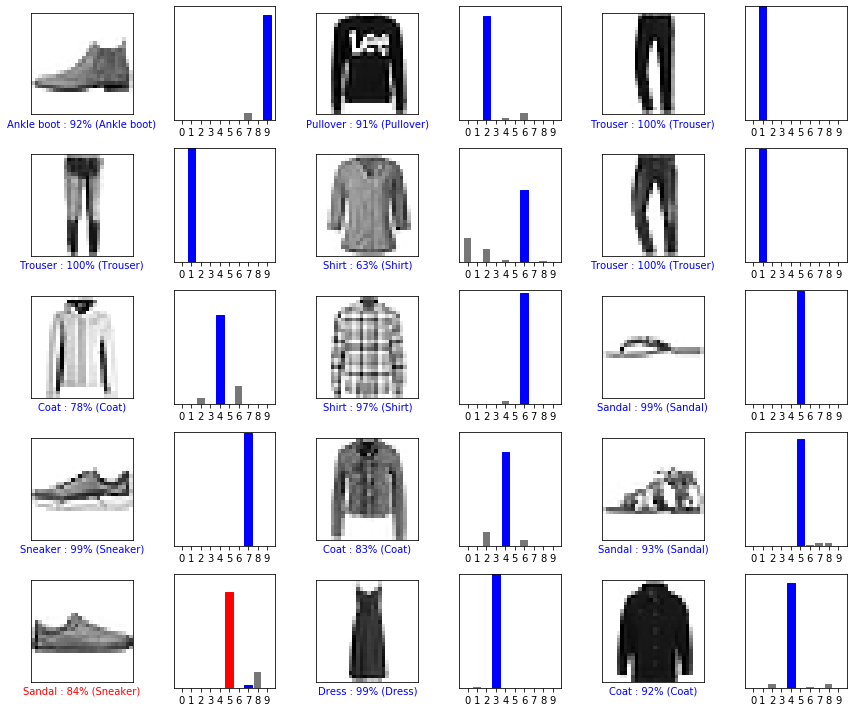

In [39]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [43]:
img = test_images[1]
print(img.shape)

(28, 28)


In [44]:
# tf.keras models are optimized to make predictions on a batch or collection
img = (np.expand_dims(img, 0))
print(img.shape)

(1, 28, 28)


In [45]:
predictions_single = probability_model.predict(img)

In [47]:
print(predictions_single)

[[5.2000996e-05 6.0440564e-10 9.1239887e-01 1.3006988e-06 2.5150191e-02
  1.2205115e-13 6.2387813e-02 7.8326839e-21 9.9017607e-06 1.0127874e-17]]


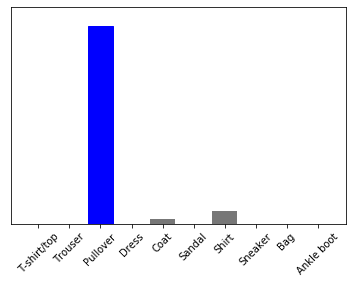

In [48]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [49]:
np.argmax(predictions_single[0])

2